In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [11]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [13]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [28]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]

In [29]:
classes[9]

'truck'

In [30]:
def plot_sample(X,y,index):
    
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

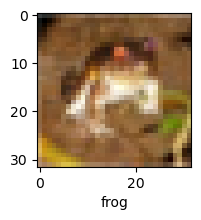

In [31]:
plot_sample(X_train, y_train, 0)

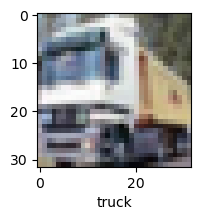

In [33]:
plot_sample(X_train, y_train, 1)

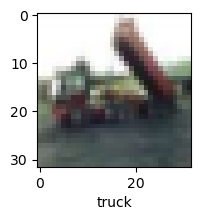

In [34]:
plot_sample(X_train, y_train, 2)

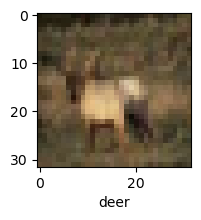

In [35]:
plot_sample(X_train, y_train, 3)

In [38]:
X_train = X_train/255
X_test = X_test/255

In [39]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 86s 54ms/step - loss: 1.8137 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6227 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5399 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4814 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4308 - accuracy: 0.4974


In [40]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.4631 - accuracy: 0.4819


[1.4631025791168213, 0.48190000653266907]

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.43      0.53      1000
           1       0.49      0.73      0.59      1000
           2       0.35      0.40      0.37      1000
           3       0.34      0.42      0.37      1000
           4       0.42      0.43      0.42      1000
           5       0.55      0.17      0.26      1000
           6       0.48      0.62      0.54      1000
           7       0.72      0.37      0.49      1000
           8       0.60      0.64      0.62      1000
           9       0.48      0.59      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [50]:
cnn = models.Sequential([
    
    # CNN layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [51]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])


In [52]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4492 - accuracy: 0.4813
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1201 - accuracy: 0.6087
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9987 - accuracy: 0.6518
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9138 - accuracy: 0.6835
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8472 - accuracy: 0.7049
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7872 - accuracy: 0.7271
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7345 - accuracy: 0.7445
Epoch 8/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6907 - accuracy: 0.7588
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6497 - accuracy: 0.7735
Epoch 10/10
1563/1563 [==============================] - 37s 24m

In [53]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9408 - accuracy: 0.6924


[0.9407861232757568, 0.6923999786376953]

In [63]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

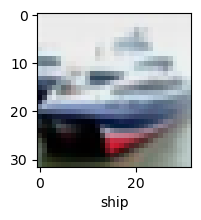

In [64]:
plot_sample(X_test, y_test,1)

In [66]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[1.61497749e-03, 6.48284622e-05, 1.18868575e-02, 8.89373124e-01,
        2.74632301e-04, 5.77631183e-02, 1.48773445e-02, 1.74221241e-05,
        2.37659626e-02, 3.61762475e-04],
       [1.07807841e-03, 1.61175892e-01, 1.04919109e-05, 4.84167867e-06,
        1.36468170e-08, 5.36657581e-07, 2.08502911e-06, 2.03284998e-08,
        8.36708784e-01, 1.01923232e-03],
       [7.53287151e-02, 1.26820460e-01, 6.40901446e-04, 2.18459754e-03,
        1.66766971e-04, 1.26520070e-04, 6.24113018e-05, 1.21278246e-03,
        7.80874610e-01, 1.25822369e-02],
       [8.42345595e-01, 2.32327671e-04, 6.57268539e-02, 2.01559393e-03,
        3.64129141e-04, 1.41916418e-04, 1.23631980e-04, 1.09507120e-04,
        8.88373107e-02, 1.03176710e-04],
       [1.24525272e-07, 1.10748044e-06, 5.72000444e-03, 6.14419691e-02,
        2.07494944e-01, 2.49261549e-03, 7.22824335e-01, 4.80047856e-06,
        1.87254482e-05, 1.31631737e-06]], dtype=float32)

In [69]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [70]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

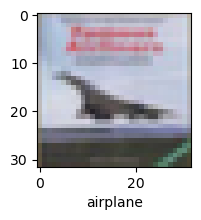

In [81]:
plot_sample(X_test, y_test,3)

In [82]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [84]:
classes[y_classes[3]]

'airplane'